## Done By Villamor, Kurt Russel
## CPE31S3

# Introduction

For this exercise, we will follow the given steps below to create our custom dataset.
1. Gather images for your dataset
2. Rename the pictures according to their classes
3. Merge them into one folder
4. Resize the pictures
5. Convert all images into the same file format
6. Convert images into a CSV file
7. A few tweaks to the CSV file
8. Load the CSV

# Step 1: Gather images for your dataset

For this step, you will gather data based on your own handwriting. This dataset will then be used later on for our classification activity. You should have written the numbers 0->9 and come up with a couple of images like the figure below.

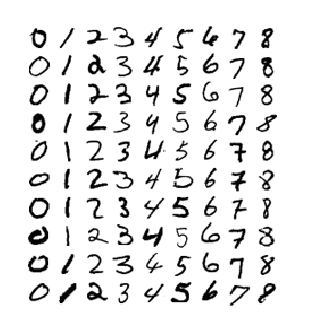

# Step 2: Rename the pictures according to their classes

Using any tool, crop the photos and so that we will get individual images of each digit.

# Step 3: Merge into one folder

Create a folder for each digit and store each image in that folder such that, we have 0(1), 0(2), 0(3), ... 0(n); based on the number of images we have obtained.

# Step 4: Resize the images

Using any tool, you must resize the pictures to 28x28 (similar to the size of individual images in the MNIST dataset).

# Step 5: Convert all images into the same file format

Here is a neat trick to do this easily and efficiently. You could either choose .png or .jpg format.

1. Type cmd on the taskbar search field and jointly press Ctrl + Shift + Enter keys. If you come across UAC prompt, click Yes.

2. In the Command Prompt, first input the path of the new folder where you stored the files (images of Spotlight). To do so, type in `cd path_of_your_folder`

3. To Change the images to JPG format, type in the given batch command, and press Enter. `Ren *.* *.jpg`

4. To convert the images to PNG format, use the following batch command `Ren *.* *.png`

You don't have to convert the images to jpg and png, just choose one.

## Assuming the size and file type is uniform, i only need to change the name of every single files in different directories

In [3]:
import os

print(os.system("pwd"))
lst_fol = os.listdir('images/OWN_DATASET')
for file in lst_fol:
    fl_name = os.listdir(f'images/OWN_DATASET/{file}')
    cnt = 0
    for name in fl_name:
         # Renaming all the names based by given format
        os.system(f"mv 'images/OWN_DATASET/{file}/{name}' 'images/OWN_DATASET/{file}/{file}({cnt})'.png")
        cnt+=1

/home/kurty/py-environment/PythonProjects/learn_Python/School_Activities/Introduction_in_Machine_Learning/Prelims/HA03
0


mv: 'images/OWN_DATASET/0/0(2).png' and 'images/OWN_DATASET/0/0(2).png' are the same file
mv: 'images/OWN_DATASET/0/0(4).png' and 'images/OWN_DATASET/0/0(4).png' are the same file
mv: 'images/OWN_DATASET/0/0(8).png' and 'images/OWN_DATASET/0/0(8).png' are the same file
mv: 'images/OWN_DATASET/0/0(11).png' and 'images/OWN_DATASET/0/0(11).png' are the same file
mv: 'images/OWN_DATASET/0/0(14).png' and 'images/OWN_DATASET/0/0(14).png' are the same file


# Step 6: Convert images into .csv file

Run the following code to convert all the images into a CSV and label them accordingly.

In [18]:
from PIL import Image
import numpy as np
import sys
import os
import csv

In [60]:
# default format can be changed as needed
def createFileList(myDir, format='.png'): #
    fileList = []
    print(myDir)
    labels = []
    names = []
    keywords = {"0(":0,
                "1(":1,
               "2(":2,
               "3(":3,
               "4(":4,
               "5(":5,
               "6(":6,
               "7(":7,
               "8(":8,
               "9(":9} # keys and values to be CHANGED.
    for root, dirs, files in os.walk(myDir, topdown=True):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
            for keyword in keywords:
                if keyword in name:
                    labels.append(keywords[keyword])
                else:
                    continue
            names.append(name)
    return fileList, labels, name

In [63]:
# load the original image

myFileList, labels, names  = createFileList(
    "/home/kurty/py-environment/PythonProjects/learn_Python/School_Activities/Introduction_in_Machine_Learning/Prelims/HA03/images/OWN_DATASET"
)
i = 0
print(labels)
for file in myFileList:
    print(file)
    img_file = Image.open(file)
    # img_file.show()
    
# get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

# Make image Greyscale
    img_grey = img_file.convert('L') # Change this to RGB if you wish to keep colored images.
    img_grey.save('result.png')
    #img_grey.show()

# Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int64).reshape((height , width,))
    value = value.flatten()
    
    value = np.append(labels[i], value)
    i += 1

    print(value)
    # Replace groupN with group name i.e. _team5.
    with open(
        "/home/kurty/py-environment/PythonProjects/learn_Python/School_Activities/Introduction_in_Machine_Learning/Prelims/HA03/customdataset_villamor.csv", 'a'
    ) as f:
        writer = csv.writer(f)
        writer.writerow(value)


/home/kurty/py-environment/PythonProjects/learn_Python/School_Activities/Introduction_in_Machine_Learning/Prelims/HA03/images/OWN_DATASET
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
/home/kurty/py-environment/PythonProjects/learn_Python/School_Activities/Introduction_in_Machine_Learning/Prelims/HA03/images/OWN_DATASET/4/4(0).png
[  4 227 227 227 227 227 227 227 227 227 227 227 227 227 227 227 227 227
 227 227 227 227 227 227 227 227 227 227 227 227 227 227 227 227 227 227
 227 227 227 227 227 227 227 227 227 227 227 227 227 227 227 227 227 227
 227 227 227 227 227 227 227 22

You are tasked with debugging the code. Make changes where possible to optimize for your solution.

**What changes did you make to the code and why?**
- First of the changes I made are making a dictionary fo the keywords that will be useful for labeling the digits whenever transfered to array.
- with this the labels are easier to identify when we tweak the csv file

# Step 7: Tweak the .csv file

1. Scroll to the end, click on an empty cell and use the following Excel formula to concatenate the pixel values.
```
=TEXTJOIN(" ", TRUE, (A1:B1))
#replace B1 with last but one column name
```
2. Drag the formula to the remaining rows.
3. Copy that column values to the notepad. Re-copy them and paste them back. This way, you will retain the pixel values and not the formula.
4. Now select all cells except the labels and concatenated values and delete them.
5. Cut the remaining columns and paste them at the beginning of the sheet.
6. Name the columns accordingly.

# Step. 8: Load the .csv file and generate image

Run the code below and configure, make sure you are able to show an image for each class.

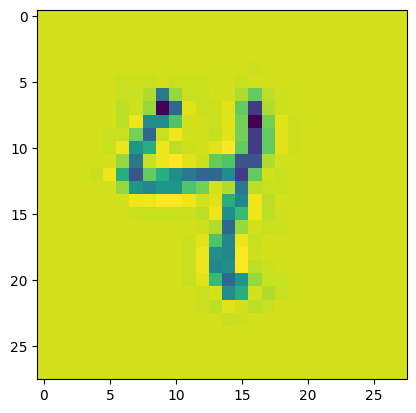

In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

dataset_path = "/home/kurty/py-environment/PythonProjects/learn_Python/School_Activities/Introduction_in_Machine_Learning/Prelims/HA03/p"
image_size=(28,28) #add 3 if RGB image

def load():
    data = pd.read_csv(dataset_path)
    pixels = data['DATA'].tolist()
    width, height= 28, 28 ,# add depth 3 if RGB image
    faces = []
    for pixel_sequence in pixels:
        face = [int(pixel) for pixel in pixel_sequence.split(' ')]
        face = np.asarray(face).reshape(width, height,) #add depth if RGB image
        # a = face
        face = np.resize(face.astype('uint8'),image_size)
        faces.append(face.astype('float32'))
    faces = np.asarray(faces)
    A = faces
    faces = np.expand_dims(faces, -1)
    return faces, A

faces,A = load()
plt.imshow(A[8].astype("uint8"))

# Summary, Conclusions and Lessons Learned

- In conclusion, This activity takes be back in the process of data wrangling in elective 1 but the difference is, we are the one who will write our own data. This also taught me the process of transforming a physical data to an electronic data which gives us an idea that we don't need to rely in others data everytime.